### Ejercicio 3: Validación y rediseño.

Una vez realizados los cálculos analíticos del **Ejercicio 1** (Planta de 1er orden + PI), procederemos a validar los resultados mediante simulación.

Asumiremos que los cálculos teóricos para $\zeta=0.707$ y $\omega_n=5$ rad/s arrojaron los siguientes valores:
* $K_p = 0.507$
* $K_i = 2.5$

**Instrucciones:**

1.  **Ejecute la celda de código inferior:** Esta celda contiene la definición del sistema con los valores teóricos calculados, genera la gráfica de respuesta al escalón y muestra las métricas de desempeño.
2.  **Analice los resultados:** Observe las métricas impresas. ¿Se cumple el sobreimpulso máximo del 5% que prometía la teoría?

--- Función de transferencia de lazo cerrado (Teórico). ---
<TransferFunction>: sys[822]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5.07 s + 25
  -----------------
  s^2 + 7.07 s + 25


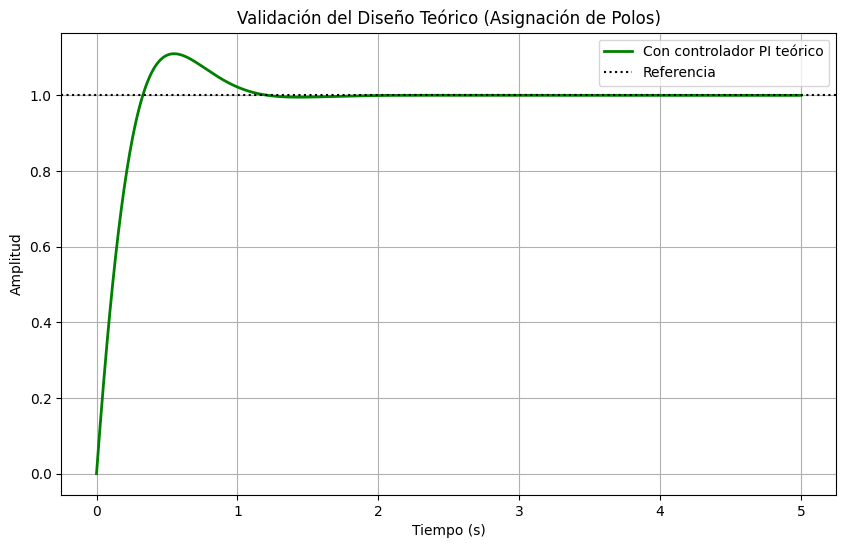

--- Análisis de Polos y Ceros. ---
Polos del sistema controlado: [-3.535+3.53606773j -3.535-3.53606773j]
Ceros del sistema controlado: [-4.93096647+0.j]


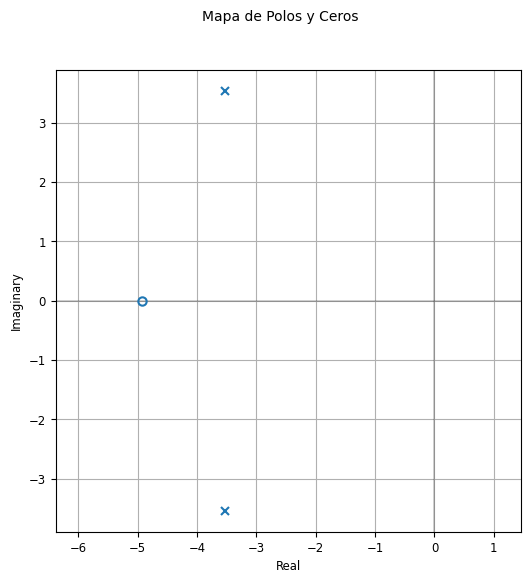


--- Métricas de desempeño del sistema (PI Teórico). ---
- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.

- Métricas reales de la simulación:
Sobreimpulso (Overshoot):       11.01 %
Tiempo de Establecimiento (2%): 1.0264 s
Valor Final:                    1.0000


In [23]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición del sistema y controlador. ---
# Planta Gp(s) = 10 / (s+2).
num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador PI Teórico: Gc = (Kps + Ki)/s.
# Valores obtenidos del diseño teórico (Zeta=0.707)
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])

# Sistema en lazo cerrado con el controlador: G_LC = (Gc*Gp) / (1 + Gc*Gp).
G_LC = ct.feedback(Gc * Gp, 1)
print("--- Función de transferencia de lazo cerrado (Teórico). ---")
print(G_LC)


# --- 2. Simulación y gráfica de las respuestas. ---
# Vector de tiempo: 0 a 5 segundos.
t = np.linspace(0, 5, 1000)

# Obtener respuesta al escalón.
_, y_LC = ct.step_response(G_LC, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_LC, 'g-', linewidth=2,  label='Con controlador PI teórico')
plt.axhline(y=1, color='k', linestyle=':', label='Referencia')

plt.title('Validación del Diseño Teórico (Asignación de Polos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Mapa de Polos y Ceros ---
print("--- Análisis de Polos y Ceros. ---")
polos = ct.poles(G_LC)
ceros = ct.zeros(G_LC)
print(f"Polos del sistema controlado: {polos}")
print(f"Ceros del sistema controlado: {ceros}")

plt.figure(figsize=(6, 6))
ct.pzmap(G_LC, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


# --- 4. Métricas de desempeño. ---
info = ct.step_info(G_LC)
print("\n--- Métricas de desempeño del sistema (PI Teórico). ---")
print("""- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.""")

print(f"\n- Métricas reales de la simulación:")
print(f"Sobreimpulso (Overshoot):       {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info['SettlingTime']:.4f} s")
print(f"Valor Final:                    {y_LC[-1]:.4f}")

#### Realice lo siguiente.

Al ejecutar la simulación anterior, notará que el sobreimpulso real es mayor al 4.3% esperado teóricamente.
Esto se debe a la presencia del cero ($s = -K_i/K_p$) introducido por el controlador PI, el cual no fue considerado en las fórmulas estándar de segundo orden usadas para el cálculo.

**Actividad a realizar:**
Rediseñe las ganancias del controlador ($K_p$ y/o $K_i$) para lograr que el sobreimpulso sea **menor o igual al 5%**.

1.  **Rediseño:** Puede proponer un nuevo $\zeta$ (mayor a 0.707) y recalcular, o utilizar el método de LGR para ajustar la ganancia. *Nota: Para este rediseño, puede ser flexible con el requisito del tiempo de establecimiento.* 
2.  **Justificación:** En una nueva celda de Markdown (incluyendo sus cálculos en fotografía, como cólidgo o como celda de Markdown/Python), justifique brevemente su elección mostrando el nuevo cálculo. **(2.5 puntos)**
3.  **Comparación:** Agregue una celda de código final donde grafique en la misma figura: **(1.0 puntos)**
    * La respuesta con el PI Teórico (Original).
    * La respuesta con el PI Rediseñado (Modificado).
    * Imprima las nuevas métricas para verificar el cumplimiento.

### Solucion
Se propone aumentar el amortiguamiento a $\zeta = 1.0$, manteniendo $\omega_{n} = 5$ rad/s.

Nuevos polinomios:

Polinomio des (s): $s^{2} + 2(1)(5)s + 5^{2} = s^{2} + 10s + 25$.

Polinomio real (s): $s^{2} + (2 + 10K_{p})s + 10K_{i}$.

$\Delta$ real = $\Delta$ deseado

Igualando obtenemos:

$2 + 10K_{p} = 10$

$10K_{p} = 8$

$K_{p} = 0.8$

$10K_{i} = 25$

$K_{i} = 2.5$

Nuevas ganancias obtenidas: 

$K_{p} = 0.8$, $K_{i} = 2.5$.

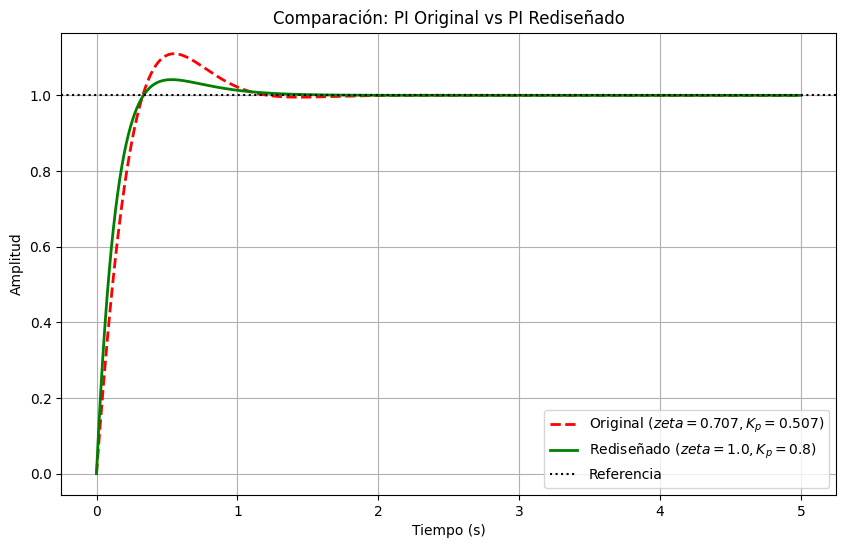


--- Métricas del Diseño Rediseñado (Kp=0.8, Ki=2.5) ---
Sobreimpulso (Overshoot): 4.17 %
Tiempo de Establecimiento (2%): 0.8931 s
Valor Final: 1.0000

 Por lo tanto, el sobreimpulso es menor o igual al 5%.


In [4]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np



num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)




Kp_old = 0.507
Ki_old = 2.5
Gc_old = ct.tf([Kp_old, Ki_old], [1, 0])
GLC_old = ct.feedback(Gc_old * Gp, 1)


Kp_new = 0.8 
Ki_new = 2.5  
Gc_new = ct.tf([Kp_new, Ki_new], [1, 0])
GLC_new = ct.feedback(Gc_new * Gp, 1)

# --- SIMULACIÓN ---
t = np.linspace(0, 5, 1000)


y_old = ct.step_response(GLC_old, T=t)[1] 
y_new = ct.step_response(GLC_new, T=t)[1]

# --- GRÁFICA COMPARATIVA ---
plt.figure(figsize=(10, 6))


plt.plot(t, y_old, 'r--', linewidth=2, label=f'Original ($zeta=0.707, K_p={Kp_old}$)')

plt.plot(t, y_new, 'g-', linewidth=2, label=f'Rediseñado ($zeta=1.0, K_p={Kp_new}$)')


plt.axhline(y=1, color='k', linestyle=':', label='Referencia')

plt.title('Comparación: PI Original vs PI Rediseñado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


info_new = ct.step_info(GLC_new)
print(f"\n--- Métricas del Diseño Rediseñado (Kp={Kp_new}, Ki={Ki_new}) ---")
print(f"Sobreimpulso (Overshoot): {info_new['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info_new['SettlingTime']:.4f} s")
print(f"Valor Final: {y_new[-1]:.4f}")


if info_new['Overshoot'] <= 5.0:
    print("\n Por lo tanto, el sobreimpulso es menor o igual al 5%.")
else:
    print("\n[ATENCIÓN] Aún se requiere más amortiguamiento.")

### Conclusión 
Se eligieron $K_p=0.8$ y $K_i=2.5$ porque al sustituirios en el polinomio característico se obtiene $s^2+$
$10s+25$, cuyas raíces son un par de polos reales iguales en $s=-5$. Esto corresponde a $\zeta=1$ y
$\omega_n=5$,logro así un sistema crfticamente amortiguado con sobreimpulso teórico nulo cumpliendo la condición de $M_p\leq5\%$ y un tiempo de asentamiento aproximado $T_s\approx0.8$ s. 